# Market Segmentation with Clustering - Lab

## Introduction

In this lab, you'll use your knowledge of clustering to perform market segmentation on a real-world dataset!

## Objectives

In this lab you will: 

- Use clustering to create and interpret market segmentation on real-world data 

## Getting Started

In this lab, you're going to work with the [Wholesale customers dataset](https://archive.ics.uci.edu/ml/datasets/wholesale+customers) from the UCI Machine Learning datasets repository. This dataset contains data on wholesale purchasing information from real businesses. These businesses range from small cafes and hotels to grocery stores and other retailers. 

Here's the data dictionary for this dataset:

|      Column      |                                               Description                                              |
|:----------------:|:------------------------------------------------------------------------------------------------------:|
|       FRESH      |                    Annual spending on fresh products, such as fruits and vegetables                    |
|       MILK       |                               Annual spending on milk and dairy products                               |
|      GROCERY     |                                   Annual spending on grocery products                                  |
|      FROZEN      |                                   Annual spending on frozen products                                   |
| DETERGENTS_PAPER |                  Annual spending on detergents, cleaning supplies, and paper products                  |
|   DELICATESSEN   |                           Annual spending on meats and delicatessen products                           |
|      CHANNEL     | Type of customer.  1=Hotel/Restaurant/Cafe, 2=Retailer. (This is what we'll use clustering to predict) |
|      REGION      |            Region of Portugal that the customer is located in. (This column will be dropped)           |



One benefit of working with this dataset for practice with segmentation is that we actually have the ground-truth labels of what market segment each customer actually belongs to. For this reason, we'll borrow some methodology from supervised learning and store these labels separately, so that we can use them afterward to check how well our clustering segmentation actually performed. 

Let's get started by importing everything we'll need.

In the cell below:

* Import `pandas`, `numpy`, and `matplotlib.pyplot`, and set the standard alias for each. 
* Use `numpy` to set a random seed of `0`.
* Set all matplotlib visualizations to appear inline.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(0)


Now, let's load our data and inspect it. You'll find the data stored in `'wholesale_customers_data.csv'`. 

In the cell below, load the data into a DataFrame and then display the first five rows to ensure everything loaded correctly.

In [3]:
raw_df = pd.read_csv('wholesale_customers_data.csv')
raw_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Now, let's go ahead and store the `'Channel'` column in a separate variable and then drop both the `'Channel'` and `'Region'` columns. Then, display the first five rows of the new DataFrame to ensure everything worked correctly. 

In [4]:
channels = raw_df.Channel
df = raw_df.drop(columns='Channel')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


Now, let's get right down to it and begin our clustering analysis. 

In the cell below:

* Import `KMeans` from `sklearn.cluster`, and then create an instance of it. Set the number of clusters to `2`
* Fit it to the data (`df`) 
* Get the predictions from the clustering algorithm and store them in `cluster_preds` 

In [5]:
from sklearn.cluster import KMeans

In [6]:
k_means = KMeans(n_clusters=2)
k_means.fit(df)
cluster_preds = k_means.labels_

Now, use some of the metrics to check the performance. You'll use `calinski_harabasz_score()` and `adjusted_rand_score()`, which can both be found inside `sklearn.metrics.cluster`. 

In the cell below, import these scoring functions. 

In [7]:
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score

Now, start with CH score to get the variance ratio. 

In [8]:
calinski_harabasz_score(df,cluster_preds)

171.6846159379035

Although you don't have any other numbers to compare this to, this is a pretty low score, suggesting that the clusters aren't great. 

Since you actually have ground-truth labels, in this case you can use `adjusted_rand_score()` to check how well the clustering performed. Adjusted Rand score is meant to compare two clusterings, which the score can interpret our labels as. This will tell us how similar the predicted clusters are to the actual channels. 

Adjusted Rand score is bounded between -1 and 1. A score close to 1 shows that the clusters are almost identical. A score close to 0 means that predictions are essentially random, while a score close to -1 means that the predictions are pathologically bad, since they are worse than random chance. 

In the cell below, call `adjusted_rand_score()` and pass in `channels` and `cluster_preds` to see how well your first iteration of clustering performed. 

In [9]:
adjusted_rand_score(channels,cluster_preds)

-0.03060891241109425

According to these results, the clusterings were essentially no better than random chance. Let's see if you can improve this. 

### Scaling our dataset

Recall that k-means clustering is heavily affected by scaling. Since the clustering algorithm is distance-based, this makes sense. Let's use `StandardScaler` to scale our dataset and then try our clustering again and see if the results are different. 

In the cells below:

* Import and instantiate [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and use it to transform the dataset  
* Instantiate and fit k-means to this scaled data, and then use it to predict clusters 
* Calculate the adjusted Rand score for these new predictions 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [11]:
scaled_k_means = KMeans(n_clusters=2).fit(scaled_df)

scaled_preds = scaled_k_means.labels_

In [12]:
adjusted_rand_score(channels,scaled_preds)

0.21875074770850253

That's a big improvement! Although it's not perfect, we can see that scaling our data had a significant effect on the quality of our clusters. 

## Incorporating PCA

Since clustering algorithms are distance-based, this means that dimensionality has a definite effect on their performance. The greater the dimensionality of the dataset, the greater the total area that we have to worry about our clusters existing in. Let's try using Principal Component Analysis to transform our data and see if this affects the performance of our clustering algorithm. 

Since you've already seen PCA in a previous section, we will let you figure this out by yourself. 

In the cells below:

* Import [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from the appropriate module in sklearn 
* Create a `PCA` instance and use it to transform our scaled data  
* Investigate the explained variance ratio for each Principal Component. Consider dropping certain components to reduce dimensionality if you feel it is worth the loss of information 
* Create a new `KMeans` object, fit it to our PCA-transformed data, and check the adjusted Rand score of the predictions it makes. 

**_NOTE:_** Your overall goal here is to get the highest possible adjusted Rand score. Don't be afraid to change parameters and rerun things to see how it changes. 

In [13]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA()
pca.fit(scaled_df)
pd.DataFrame(pca.fit_transform(scaled_df))

,0,1,2,3,4,5,6
0,0.205470,-0.268756,-0.675597,-0.075317,-0.406328,0.489332,-0.007572
1,0.446228,-0.294124,-0.591560,0.373811,-0.094630,0.358631,0.054398
2,0.824133,0.847760,-0.538481,1.597062,-1.150100,-0.383600,-0.277687
3,-0.766022,0.686296,-0.495091,0.200362,0.452501,-0.284173,0.060521
4,0.179955,1.305515,-0.598799,0.133292,-0.750576,-0.398845,-0.026971
...,...,...,...,...,...,...,...
435,0.884158,2.247667,-0.361818,-0.590459,1.095750,0.415357,0.869310
436,-0.888015,1.713980,-0.696669,-1.352671,-0.522285,-0.261400,-0.226674
437,3.476310,-1.010138,-0.624564,-0.663490,0.092250,-0.545242,-0.085523
438,-0.905486,0.007492,-0.645205,0.323172,-0.438895,-0.099372,-0.029113


<BarContainer object of 7 artists>

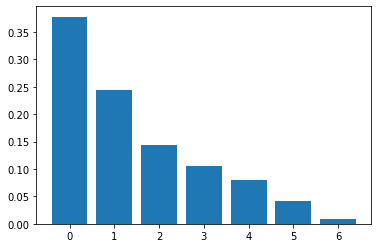

In [56]:
indices = np.arange(len(pca.explained_variance_))
plt.bar(indices,pca.explained_variance_ratio_)

In [57]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

In [58]:
eig_vectors

array([[ 2.05690181e-02,  4.36834460e-02,  5.45171062e-01,
         5.78949643e-01,  5.12486019e-02,  5.48207659e-01,
         2.49231700e-01],
       [ 5.83252985e-02,  5.28766954e-01,  8.23342670e-02,
        -1.47305448e-01,  6.07641595e-01, -2.56372374e-01,
         5.03558080e-01],
       [-9.86181604e-01, -6.88203033e-02,  7.07125304e-04,
         1.05440202e-02,  1.49286109e-01,  1.01145237e-02,
         1.44667411e-02],
       [ 8.47401397e-02, -8.04569548e-01,  6.27275168e-02,
        -1.11676621e-01,  1.54245575e-01, -1.40828673e-01,
         5.34280947e-01],
       [ 1.27650909e-01, -2.50770641e-01, -8.36913574e-02,
         1.01593435e-01,  7.62194119e-01,  1.66705525e-01,
        -5.42921039e-01],
       [-1.20490297e-02, -4.73983691e-02,  8.26815676e-01,
        -3.15128999e-01, -2.97000191e-02, -3.39933028e-01,
        -3.13434543e-01],
       [-3.05474708e-04, -3.60049216e-02, -3.80254527e-02,
         7.21739607e-01, -1.56609801e-02, -6.85901855e-01,
        -7.5119478

In [28]:
structure_loading = eig_vectors[0]* np.sqrt(eig_values[0])
str_loading = pd.Series(structure_loading, index=df.columns)
str_loading

Region              0.033495
Fresh               0.071134
Milk                0.887758
Grocery             0.942763
Frozen              0.083453
Detergents_Paper    0.892703
Delicassen          0.405850
dtype: float64

In [61]:
pc_and_k = []
for i in indices:  
    pc = PCA(n_components=i)
    pc_df = pc.fit_transform(scaled_df)
    vect = pc.components_
    
    
    k_mean = KMeans(n_clusters=7-i)
    k_mean.fit(pc_df)
    pred = k_mean.labels_
    score = adjusted_rand_score(channels,pred)
    pc_and_k.append((i,score))
    
    
    
    

In [62]:
pc_and_k

[(0, 0.186038437289875),
 (1, 0.18392172933754025),
 (2, 0.05025015935744066),
 (3, 0.09714775249869621),
 (4, 0.0645282446020548),
 (5, 0.23084287036169227),
 (6, 0.0)]


**_Question_**:  What was the Highest Adjusted Rand Score you achieved? Interpret this score and determine the overall quality of the clustering. Did PCA affect the performance overall?  How many principal components resulted in the best overall clustering performance? Why do you think this is?

Write your answer below this line:
_______________________________________________________________________________________________________________________________

## Optional (Level up) 

### Hierarchical Agglomerative Clustering

Now that we've tried doing market segmentation with k-means clustering, let's end this lab by trying with HAC!

In the cells below, use [Agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to make cluster predictions on the datasets we've created and see how HAC's performance compares to k-mean's performance. 

**_NOTE_**: Don't just try HAC on the PCA-transformed dataset -- also compare algorithm performance on the scaled and unscaled datasets, as well! 

## Summary

In this lab, you used your knowledge of clustering to perform a market segmentation on a real-world dataset. You started with a cluster analysis with poor performance, and then implemented some changes to iteratively improve the performance of the clustering analysis!